In [5]:
import qiskit
import numpy as np
import sys
sys.path.insert(1, '../')
import matplotlib.pyplot as plt
import qtm.base, qtm.constant, qtm.qcompilation, qtm.ansatz
%load_ext autoreload
%autoreload 2

In [6]:
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2*np.pi)
lambdaz = 0

In [7]:
qcu3 = qiskit.QuantumCircuit(1, 1)
qcu3.u(theta, phi, lambdaz, 0)
compiler = qtm.qcompilation.QuantumCompilation(
    u = qcu3,
    vdagger = qtm.ansatz.zxz_layer(1).inverse(),
    optimizer = 'adam',
    loss_func = 'loss_fubini_study'
)
compiler.fit(num_steps = 100, verbose = 1)

Step: 100%|██████████| 100/100 [00:04<00:00, 23.70it/s]


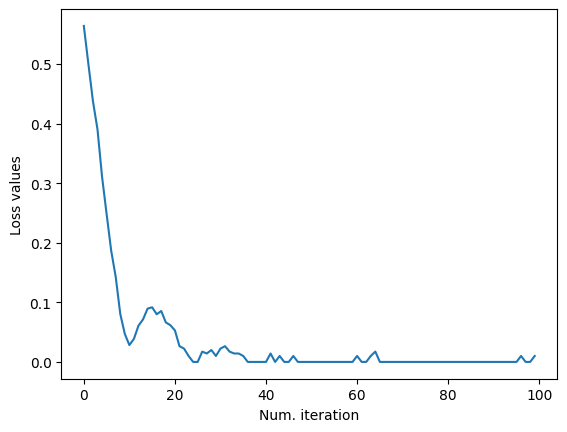

In [9]:
compiler.plot()

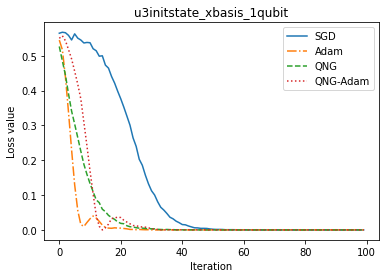

In [ ]:
plt.plot(loss_values_sgd, label='SGD', linestyle = '-')
plt.plot(loss_values_adam, label='Adam', linestyle = '-.')
plt.plot(loss_values_qng, label='QNG', linestyle = '--')
plt.plot(loss_values_qng_adam, label='QNG-Adam', linestyle = ':')
plt.title('u3initstate_xbasis_onequbit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.savefig('u3initstate_xbasis_onequbit.png', format='png', dpi=600)
plt.show() 

In [14]:
np.savetxt("./compare/u3initstate_xbasis_onequbit/loss_values_sgd.csv", loss_values_sgd, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_onequbit/loss_values_adam.csv", loss_values_adam, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_onequbit/loss_values_qng.csv", loss_values_qng, delimiter=",")
np.savetxt("./compare/u3initstate_xbasis_onequbit/loss_values_qng_adam.csv", loss_values_qng_adam, delimiter=",")